## <h1><center>IE 345 - K “Introduction to Deep Learning: Fundamentals Concepts” </center></h1>
### Prof. Yuzo
#### Resolution of the "Hello World" of Deep Learning with the MNIST dataset.
##### pg. 80 - 89

In [10]:
#Libraries

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

In [43]:
# Hyperparameters

input_size = 784
hidden_size =500
num_classes =10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

In [44]:
#MNIST dataset for training and test set

train_dataset = dsets.MNIST(root = './data', 
                            train = True,
                            transform = transforms.ToTensor(),
                            download = True)

test_dataset = dsets.MNIST(root = './data',
                        train = False,
                       transform = transforms.ToTensor())

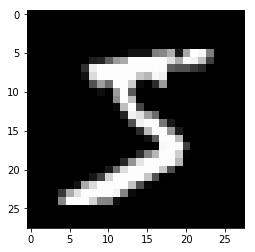

In [45]:
# Using Matplotlib 

sample_image = torch.Tensor.numpy(train_dataset[0][0][0])
plt.imshow(np.reshape(sample_image, [28, 28]), cmap = 'gray')
plt.show()

In [46]:
#Load MNIST using data loader
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = False)

In [47]:
# Define Artificial neural network 

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [48]:
# Initialize Neural Network Class
net = Net(input_size, hidden_size, num_classes)

# Create loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr = learning_rate)

In [49]:
# Train the model for num_epochs

epoch = []
loss = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        optimizer.zero_grad() # zero the gradient buffer
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if(i+1) % 100 == 0:
            print('Epoch [%d/%d], Step[%d/%d], Loss: %.4f' 
                  %(epoch+1, num_epochs, i+1,
                    len(train_dataset)//batch_size, loss.item()))

Epoch [1/10], Step[100/600], Loss: 0.3720
Epoch [1/10], Step[200/600], Loss: 0.2920
Epoch [1/10], Step[300/600], Loss: 0.1762
Epoch [1/10], Step[400/600], Loss: 0.1778
Epoch [1/10], Step[500/600], Loss: 0.1467
Epoch [1/10], Step[600/600], Loss: 0.1984
Epoch [2/10], Step[100/600], Loss: 0.1141
Epoch [2/10], Step[200/600], Loss: 0.0643
Epoch [2/10], Step[300/600], Loss: 0.0682
Epoch [2/10], Step[400/600], Loss: 0.0959
Epoch [2/10], Step[500/600], Loss: 0.0902
Epoch [2/10], Step[600/600], Loss: 0.0661
Epoch [3/10], Step[100/600], Loss: 0.0400
Epoch [3/10], Step[200/600], Loss: 0.0469
Epoch [3/10], Step[300/600], Loss: 0.0294
Epoch [3/10], Step[400/600], Loss: 0.1347
Epoch [3/10], Step[500/600], Loss: 0.1071
Epoch [3/10], Step[600/600], Loss: 0.2350
Epoch [4/10], Step[100/600], Loss: 0.0913
Epoch [4/10], Step[200/600], Loss: 0.1955
Epoch [4/10], Step[300/600], Loss: 0.0455
Epoch [4/10], Step[400/600], Loss: 0.0493
Epoch [4/10], Step[500/600], Loss: 0.0099
Epoch [4/10], Step[600/600], Loss:

In [50]:
#Test the model

correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted.cpu() == labels).sum()
    
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))    

Accuracy of the network on the 10000 test images: 98 %


## NOTE: Installation of Pytorch

If you follow our step by step tutorial of installation, follow the next code for install Pytorch:
1. Open the Anaconda Prompt and activate the environment which you created with the code:

   - *activate tensorflow*

2. After activating your environment, type in the environment:

   - *conda install pytorch-cpu torchvision-cpu -c pytorch*

Instllation, tutorials, and examples with Pytorch visit:
https://pytorch.org/get-started/locally/

*Pablo David Minango Negrete*

$pablodavid218@gmail.com$